In [16]:
# import libraries
import copy
import datetime
import googlemaps
import itertools
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymysql
import re
import requests
import seaborn as sns
import statsmodels.formula.api as smf
import string
import swifter
import time
import urllib
from bs4 import BeautifulSoup as bs
from config import gkey
from IPython.display import clear_output
from requests import get
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from selenium import webdriver
from splinter import Browser
from sqlalchemy import create_engine
pymysql.install_as_MySQLdb()
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, roc_auc_score


In [4]:
# Read CSV file for NCAA players
df = pd.read_csv("NCAA_Conversions_031319.csv")
df.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (25,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,3P%,3PA,3PM,AST,BLK,DEF,FG%,FGA,FGM,...,name_dob,pob,pos,season,tenure,unique_id,weight,zodiac,lat,long
0,0,0.360,5.83,2.10,1.80,0.43,3.27,0.398,8.77,3.49,...,Ty Abbott_19880819,Phoenix (AZ),G,2011.0,8.0,Ty Abbott_1988-08-19,209,Leo,33.448377,-112.074037
1,1,0.324,0.73,0.24,0.55,0.00,0.33,0.448,1.31,0.59,...,Mustafa Abdul-Hamid_19880602,St. Louis (MO),G,2010.0,6.0,Mustafa Abdul-Hamid_1988-06-02,195,Gemini,38.627003,-90.199404
2,2,0.333,0.21,0.07,0.07,0.00,0.21,0.182,0.79,0.14,...,Larney Abdush-Shakur_19400101,Austell (GA),PG,2009.0,4.0,Larney Abdush-Shakur_1940-01-01,153,Capricorn,33.812606,-84.634378
3,3,0.333,0.50,0.17,0.00,0.00,0.17,0.333,0.50,0.17,...,Toso Abedamowo_19400101,Lincoln (RI),G,2011.0,6.0,Toso Abedamowo_1940-01-01,190,Capricorn,41.911012,-71.441810
4,4,0.000,0.00,0.00,0.28,1.10,2.17,0.497,2.57,1.28,...,Onyekautukwu Abiakam_19870304,Lagos,F,2011.0,7.0,Onyekautukwu Abiakam_1987-03-04,195,Pisces,6.524379,3.379206


In [6]:
df[(df.drafted==1)&(df.season==2017)]

,Unnamed: 0,3P%,3PA,3PM,AST,BLK,DEF,FG%,FGA,FGM,...,name_dob,pob,pos,season,tenure,unique_id,weight,zodiac,lat,long
20521,20521,0.412,5.4,2.2,7.6,0.8,5.1,0.551,9.5,5.3,...,Lonzo Ball_19971027,Anaheim (CA),PG,2017.0,2.0,Lonzo Ball_1997-10-27,190,Scorpio,33.836593,-117.914301
20538,20538,0.378,3.3,1.3,2.3,0.3,3.3,0.470,9.1,4.3,...,Jamel Artis_19930112,Baltimore (MD),F,2017.0,8.0,Jamel Artis_1993-01-12,213,Capricorn,39.290385,-76.612189
20550,20550,0.348,2.8,1.0,1.2,1.5,6.1,0.508,8.0,4.1,...,Jonathan Isaac_19971003,Bronx (NY),SF,2017.0,2.0,Jonathan Isaac_1997-10-03,210,Libra,40.844782,-73.864827
20599,20599,0.407,2.5,1.0,5.8,0.1,3.2,0.448,12.7,5.7,...,Jawun Evans_19960726,Greenville (SC),PG,2017.0,4.0,Jawun Evans_1996-07-26,190,Leo,34.852618,-82.394010
20600,20600,0.329,4.6,1.5,2.2,0.3,3.0,0.418,9.8,4.1,...,Donovan Mitchell_19960907,Greenwich (CT),SG,2017.0,4.0,Donovan Mitchell_1996-09-07,215,Virgo,41.026242,-73.628196
20608,20608,0.380,4.8,1.8,1.1,0.2,3.8,0.464,10.4,4.8,...,Damyean Dotson_19940506,Houston (TX),SG,2017.0,8.0,Damyean Dotson_1994-05-06,205,Taurus,29.760427,-95.369803
20609,20609,0.338,1.1,0.4,2.8,0.4,3.5,0.463,6.9,3.2,...,Wesley Iwundu_19941220,Houston (TX),F,2017.0,8.0,Wesley Iwundu_1994-12-20,195,Sagittarius,29.760427,-95.369803
20610,20610,0.240,0.5,0.1,1.3,1.2,3.7,0.519,9.0,4.7,...,Johnathan Motley_19950504,Houston (TX),F,2017.0,6.0,Johnathan Motley_1995-05-04,230,Taurus,29.760427,-95.369803
20618,20618,0.376,2.3,0.9,2.4,0.5,8.2,0.501,10.2,5.1,...,Caleb Swanigan_19970418,Indianapolis (IN),C,2017.0,4.0,Caleb Swanigan_1997-04-18,250,Aries,39.768403,-86.158068
20625,20625,0.476,0.5,0.3,0.4,1.8,4.2,0.652,5.3,3.5,...,Zach Collins_19971119,Las Vegas (NV),C,2017.0,2.0,Zach Collins_1997-11-19,235,Scorpio,36.169941,-115.139830


In [7]:
# Drop unnamed index column
df = df.drop(['Unnamed: 0'], axis=1)

In [8]:
df.keys()

Index(['3P%', '3PA', '3PM', 'AST', 'BLK', 'DEF', 'FG%', 'FGA', 'FGM', 'FT%',
       'FTA', 'FTM', 'GP', 'GS', 'MIN', 'OFF', 'PF', 'PTS', 'STL', 'TOV',
       'TRB', 'college', 'dob', 'drafted', 'height', 'high_school', 'link',
       'name', 'name_dob', 'pob', 'pos', 'season', 'tenure', 'unique_id',
       'weight', 'zodiac', 'lat', 'long'],
      dtype='object')

In [66]:
df['threePCT'] = df['3P%']
df['three'] = df['3PM']
df['ftpct'] = df['FT%']
df['fgpct'] = df['FG%']

In [9]:
df['height'].replace('-',np.NaN,inplace=True)

In [10]:
df['height'] = df['height'].astype(np.float64,errors='ignore')

In [11]:
df.dropna(inplace=True)

In [67]:
train = df[df.season<2017]
test = df[df.season==2017]

In [70]:
formula = 'drafted ~ threePCT + ftpct + AST +BLK + PTS + STL + TOV +MIN+ GS + height+zodiac'
model = smf.glm(formula=formula, data=train, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                drafted   No. Observations:                13082
Model:                            GLM   Df Residuals:                    13060
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -979.00
Date:                Thu, 14 Mar 2019   Deviance:                       1958.0
Time:                        01:57:50   Pearson chi2:                 9.41e+03
No. Iterations:                     9   Covariance Type:             nonrobust
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -42.6344      2.669    -15.974      0.000     -47.866     -37.403
zodiac[T.Aries]    

In [71]:
train['prediction'] = result.predict()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [72]:
# Evaluation
false_positive_rate, true_positive_rate, _ = roc_curve(train['drafted'], train['prediction'])
roc_auc_score(train['drafted'], train['prediction'])

0.9583015129942041

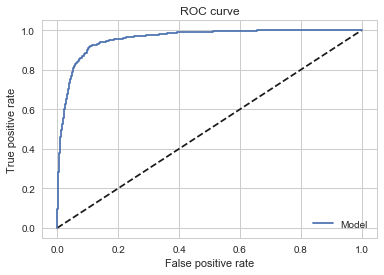

In [73]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label='Model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [74]:
confusion_matrix(train["drafted"], train['prediction'] >= .05)

array([[11480,  1162],
       [   52,   388]])

In [75]:
print(classification_report(train["drafted"], train['prediction'] >= .05))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     12642
           1       0.25      0.88      0.39       440

   micro avg       0.91      0.91      0.91     13082
   macro avg       0.62      0.89      0.67     13082
weighted avg       0.97      0.91      0.93     13082



In [76]:
test['prediction'] = result.predict(exog=test)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [77]:
false_positive_rate, true_positive_rate, _ = roc_curve(test['drafted'], test['prediction'])
roc_auc_score(test['drafted'], test['prediction'])

0.9512380781802714

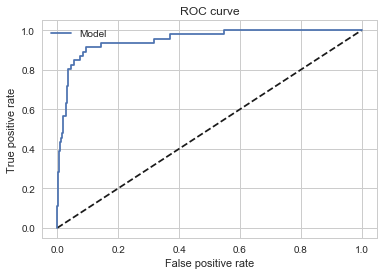

In [78]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label='Model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [79]:
threshold = test.sort_values("prediction", ascending=[0]).head(46).prediction.min()

In [80]:
confusion_matrix(test["drafted"], test['prediction'] >= threshold)

array([[1917,   25],
       [  25,   21]])

In [81]:
print(classification_report(test["drafted"], test['prediction'] >= threshold))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1942
           1       0.46      0.46      0.46        46

   micro avg       0.97      0.97      0.97      1988
   macro avg       0.72      0.72      0.72      1988
weighted avg       0.97      0.97      0.97      1988



In [83]:
test[(test.prediction>=threshold)&~test.drafted]

,3P%,3PA,3PM,AST,BLK,DEF,FG%,FGA,FGM,FT%,...,unique_id,weight,zodiac,lat,long,threePCT,three,ftpct,fgpct,prediction
10201,1.000,0.01,0.01,0.79,1.80,2.31,0.574,4.96,2.85,0.687,...,Mo Alie-Cox_1993-09-19,250,Virgo,38.968721,-77.735550,1.000,0.01,0.687,0.574,0.427863
10402,1.000,0.01,0.01,0.86,0.77,3.60,0.581,7.14,4.15,0.546,...,Michael Buchanan_1994-03-25,285,Aries,36.169941,-115.139830,1.000,0.01,0.546,0.581,0.789381
10803,0.244,0.43,0.10,2.08,1.01,5.48,0.513,13.15,6.74,0.719,...,Jimmy Hall_1994-04-02,235,Aries,40.678178,-73.944158,0.244,0.10,0.719,0.513,0.710314
11026,0.000,0.00,0.00,1.00,0.25,3.75,0.615,6.50,4.00,0.800,...,Przemek Karnowski_1993-11-08,300,Scorpio,53.013790,18.598444,0.000,0.00,0.800,0.615,0.470166
11714,0.273,0.45,0.12,0.80,2.30,2.93,0.556,6.09,3.39,0.666,...,Justin Tuoyo_1994-06-18,235,Gemini,33.387058,-84.282978,0.273,0.12,0.666,0.556,0.589307
11777,0.341,2.14,0.73,6.73,0.01,2.72,0.484,10.25,4.96,0.698,...,Mo Watson_1993-03-08,170,Pisces,39.938168,-75.271851,0.341,0.73,0.698,0.484,0.547200
11832,0.250,0.07,0.02,0.97,1.13,5.28,0.580,11.09,6.43,0.699,...,Tim Williams_1993-11-06,240,Scorpio,41.878114,-87.629798,0.250,0.02,0.699,0.580,0.770493
11854,0.405,3.50,1.42,5.21,0.07,2.33,0.433,7.28,3.15,0.845,...,Lucas Woodhouse_1994-03-11,180,Pisces,40.868987,-73.365119,0.405,1.42,0.845,0.433,0.481684
12087,0.403,7.41,2.98,2.50,0.14,2.49,0.423,13.36,5.65,0.839,...,Jared Brownridge_1994-11-13,200,Scorpio,41.760585,-88.320072,0.403,2.98,0.839,0.423,0.710263
12204,0.385,6.86,2.64,2.33,0.14,3.72,0.412,13.04,5.38,0.827,...,Garret Covington_1994-10-31,195,Scorpio,38.811436,-89.953157,0.385,2.64,0.827,0.412,0.522141


In [85]:
test[(test.prediction>=threshold)&test.drafted]

,3P%,3PA,3PM,AST,BLK,DEF,FG%,FGA,FGM,FT%,...,unique_id,weight,zodiac,lat,long,threePCT,three,ftpct,fgpct,prediction
20521,0.412,5.4,2.2,7.6,0.8,5.1,0.551,9.5,5.3,0.673,...,Lonzo Ball_1997-10-27,190,Scorpio,33.836593,-117.914301,0.412,2.2,0.673,0.551,0.998913
20550,0.348,2.8,1.0,1.2,1.5,6.1,0.508,8.0,4.1,0.780,...,Jonathan Isaac_1997-10-03,210,Libra,40.844782,-73.864827,0.348,1.0,0.780,0.508,0.712972
20599,0.407,2.5,1.0,5.8,0.1,3.2,0.448,12.7,5.7,0.818,...,Jawun Evans_1996-07-26,190,Leo,34.852618,-82.394010,0.407,1.0,0.818,0.448,0.871633
20618,0.376,2.3,0.9,2.4,0.5,8.2,0.501,10.2,5.1,0.760,...,Caleb Swanigan_1997-04-18,250,Aries,39.768403,-86.158068,0.376,0.9,0.760,0.501,0.427816
20625,0.476,0.5,0.3,0.4,1.8,4.2,0.652,5.3,3.5,0.743,...,Zach Collins_1997-11-19,235,Scorpio,36.169941,-115.139830,0.476,0.3,0.743,0.652,0.673735
20677,0.246,1.9,0.5,4.6,0.2,3.4,0.479,12.4,5.9,0.736,...,De'Aaron Fox_1997-12-20,175,Sagittarius,29.951066,-90.071532,0.246,0.5,0.736,0.479,0.831217
20714,0.373,1.1,0.4,1.2,1.2,4.1,0.592,7.5,4.4,0.718,...,Thomas Bryant_1997-07-31,248,Leo,43.156578,-77.608846,0.373,0.4,0.718,0.592,0.615006
20718,0.409,0.3,0.1,1.2,1.1,6.6,0.544,8.8,4.8,0.666,...,Ivan Rabb_1997-02-04,220,Aquarius,38.581572,-121.494400,0.409,0.1,0.666,0.544,0.521313
20734,0.342,4.0,1.4,2.1,1.1,6.0,0.452,12.6,5.7,0.849,...,Jayson Tatum_1998-03-03,208,Pisces,38.627003,-90.199404,0.342,1.4,0.849,0.452,0.831682
20749,0.413,5.0,2.1,5.9,1.2,4.4,0.476,17.6,8.4,0.649,...,Markelle Fultz_1998-05-29,200,Gemini,38.815947,-76.749691,0.413,2.1,0.649,0.476,0.998687


In [86]:
test[(test.prediction<threshold)&test.drafted]

,3P%,3PA,3PM,AST,BLK,DEF,FG%,FGA,FGM,FT%,...,unique_id,weight,zodiac,lat,long,threePCT,three,ftpct,fgpct,prediction
20538,0.378,3.3,1.3,2.3,0.3,3.3,0.470,9.1,4.3,0.759,...,Jamel Artis_1993-01-12,213,Capricorn,39.290385,-76.612189,0.378,1.3,0.759,0.470,0.171866
20600,0.329,4.6,1.5,2.2,0.3,3.0,0.418,9.8,4.1,0.788,...,Donovan Mitchell_1996-09-07,215,Virgo,41.026242,-73.628196,0.329,1.5,0.788,0.418,0.182861
20608,0.380,4.8,1.8,1.1,0.2,3.8,0.464,10.4,4.8,0.796,...,Damyean Dotson_1994-05-06,205,Taurus,29.760427,-95.369803,0.380,1.8,0.796,0.464,0.179294
20609,0.338,1.1,0.4,2.8,0.4,3.5,0.463,6.9,3.2,0.688,...,Wesley Iwundu_1994-12-20,195,Sagittarius,29.760427,-95.369803,0.338,0.4,0.688,0.463,0.221722
20610,0.240,0.5,0.1,1.3,1.2,3.7,0.519,9.0,4.7,0.654,...,Johnathan Motley_1995-05-04,230,Taurus,29.760427,-95.369803,0.240,0.1,0.654,0.519,0.300505
20630,0.188,0.2,0.0,1.5,2.2,4.7,0.610,5.4,3.3,0.630,...,Jordan Bell_1995-01-07,224,Capricorn,33.770050,-118.193740,0.188,0.0,0.630,0.610,0.202879
20658,0.288,1.8,0.5,2.0,0.6,3.3,0.494,9.8,4.8,0.612,...,Antonius Cleveland_1994-02-02,198,Aquarius,35.149534,-90.048980,0.288,0.5,0.612,0.494,0.321133
20688,0.000,0.1,0.0,1.3,0.5,2.9,0.529,5.6,2.9,0.710,...,Matt Williams_1993-10-14,210,Libra,28.538335,-81.379237,0.000,0.0,0.710,0.529,0.005303
20716,0.000,0.2,0.0,0.8,1.5,5.4,0.566,9.6,5.4,0.564,...,Jarrett Allen_1998-04-21,237,Taurus,30.508255,-97.678896,0.000,0.0,0.564,0.566,0.125868
20717,0.363,2.0,0.7,0.8,1.0,2.4,0.525,5.3,2.8,0.817,...,D.J. Wilson_1996-02-19,231,Pisces,38.581572,-121.494400,0.363,0.7,0.817,0.525,0.239323


In [6]:
df['drafted'].value_counts()

0    20519
1      543
Name: drafted, dtype: int64

In [11]:
count_not_drafted = len(df[df['drafted']==0])
count_drafted = len(df[df['drafted']==1])
pct_of_drafted = count_drafted/(count_not_drafted+count_drafted)
pct_of_no_drafted = count_not_drafted/(count_not_drafted+count_drafted)
print('percentage not drafted is', + pct_of_no_drafted*100)
print('percentage drafted is', pct_of_drafted*100)

percentage not drafted is 97.4218972557212
percentage drafted is 2.5781027442787963


In [12]:
df.groupby('drafted').mean()

,3P%,3PA,3PM,AST,BLK,DEF,FG%,FGA,FGM,FT%,...,OFF,PF,PTS,STL,TOV,TRB,season,tenure,lat,long
drafted,,,,,,,,,,,,,,,,,,,,,
0,0.237657,1.374421,0.471803,0.896942,0.242594,1.602560,0.395892,3.904635,1.698212,0.580857,...,0.686187,1.436101,4.753246,0.460161,1.000019,2.263466,2012.785954,3.254255,36.394862,-80.967269
1,0.334663,2.511439,0.909963,2.053974,0.742329,3.642453,0.476437,8.923941,4.213076,0.716969,...,1.575000,2.145794,11.909353,0.986876,1.897378,5.094273,2011.336414,2.983364,36.140251,-83.785254


In [89]:
df.loc[df['name'] == "Darren Collison"]

,3P%,3PA,3PM,AST,BLK,DEF,FG%,FGA,FGM,FT%,...,tenure,unique_id,weight,zodiac,lat,long,threePCT,three,ftpct,fgpct
20800,0.435,2.7,1.2,4.1,0.1,1.8,0.475,8.3,4.0,0.851,...,8.0,Darren Collison_1987-08-23,175,Virgo,34.106399,-117.593108,0.435,1.2,0.851,0.475
